In [30]:
number_of_cars = 2
np.zeros([number_of_cars,25])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
import gymnasium as gym
import numpy as np
import numpy as np
import pandas as pd
import gurobipy as grb
import matplotlib.pyplot as plt

""" Functions """

# Define the number of trips a vehicle does in a specific day
def find_trips(Vehicle_ID, Date):
    EV = Vehicle_ID.loc[Vehicle_ID["Start_Date"] == Date]
    trips = EV.shape[0]
    return trips

# Define the duration of each trip (in minutes) for a specific vehicle in a specific day
def trip_duration(Vehicle_ID, Date):
    EV = Vehicle_ID.loc[Vehicle_ID["Start_Date"] == Date]
    Trip_Duration = EV["Trip_Duration"]
    return Trip_Duration

# Define the off shift duration betweeb trips (in minutes) for a specific vehicle in a specific day
def off_shift_duration(Vehicle_ID, Date):
    EV = Vehicle_ID.loc[Vehicle_ID["Start_Date"] == Date]
    Off_Shift_Duration = EV["Off_Shift_Duration"]
    return Off_Shift_Duration

# Define the energy requirements for the next trip (KWh) for a specific vehicle in a specific day
def trip_energy_requirements(Vehicle_ID, Date, Nominal_Efficiency):
    EV = Vehicle_ID.loc[Vehicle_ID["Start_Date"] == Date]
    VMT_Trip = EV["Total_Distance"]
    Trip_Energy_Requirements = Nominal_Efficiency * VMT_Trip 
    return Trip_Energy_Requirements

# Define the miles travelled in each trip for a specific vehicle in a specific day
def distance_covered(Vehicle_ID, Date,):
    EV = Vehicle_ID.loc[Vehicle_ID["Start_Date"] == Date]
    VMT_Trip = EV["Total_Distance"]
    return VMT_Trip


class CentralScheduler(gym.Env):
    metadata = {'name': 'central_scheduler_v0',
                'render.modes': ['human']}
    
    def __init__(self, electricity_prices, charging_capacity, charging_rate, hours_left, date):
        super(CentralScheduler, self).__init__()
        #Initialize environment
        self.electricity_prices = electricity_prices  
        self.charging_capacity = charging_capacity 
        self.charging_rate = charging_rate 
        self.hours_left = hours_left
        self.date = date 
        self.SOC = SOC
        self.expected_soc = expected_soc
        
        #Define action space (0 or 1): Not charging and Charging
        self.action_space = spaces.Discrete(2)
        
        #Define observation space electricity prices, hours left at depot, state of charge and expected soc
        self.observation_space = spaces.Box(low=0, high=1,
                                            shape = (electricity_prices, hours_left, SOC, expected_soc))
        
        
        
        def reset(self):
            # Reset the state of the environment to an initial state.
            self.charging_capacity = charging_capacity
            self.electricity_prices = electricity_prices  
            self.charging_rate = charging_rate 
            self.hours_left = hours_left
            self.date = date 
            self.SOC = SOC
            self.expected_soc = expected_soc
            
            
            #we need to know:
            # EV's current state of charge
            # Ev's desired state of charge
            # Ev's hours left at the depot
            # The electricity prices for the next hours 
            # current price of electricity
            observation = self._get_obs()
            info = self._get_info()
            return observation, info
        
        def step(self, action):
            ''' If action is 1 it means vehicle will be charging:
            -Update the vehicle's charge depending on charging rate
            -Calculate total charging costs
            
            Update hours left at the depot 
            
            update the current time and electricity prices
            
            if there are no more hours left in the day or if the vehicle has reached full charge 
            end the episode 
            '''
            
            if action == 1:
                #Charge vehicle and update current SOC
                self.SOC += self.charging_rate.
                total_cost += current_electricity_price
                # Clip SOC to the maximum value
                self.current_SOC = min(self.current_SOC, self.max_SOC)
            #Or dont charge
            
            
            #Change time of the day
            self.timestep = self.timestep + 1
            
            #Change electricity price
            self.current_electricity_price = self.calculate_electricity_price()
            #Decrease hours left at the depot
            self.hours_left -= 1
            #update costs?
            
            if self.hours_left_at_depot <= 0 or self.current_SOC == self.max_SOC:
            terminated = True
            
            observation = self._get_obs()
            reward = self._calculate_rewards()
            
            return observation, reward, terminated, False, info
        
        def current_electricity_price():
            return current_price 
        
        def _get_obs(self):
            if self.timestep == 0:
                self.Cost_Histor
            
            self.observation_space = spaces.Dict({
            'SOC': spaces.Box(low=0, high=max_SOC, shape=(1,), dtype=np.float32),
            'time_of_day': spaces.Discrete(hours_per_day),
            'electricity_price': spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),
            'hours_left_at_depot': spaces.Discrete(hours_per_day)
        })
            
            return {"SOC": self.SOC, "expected soc": self.expected_soc, "time left": self.hours_left,
                    "Current Electricity Price": self.current_charge()}
            
        def _get_info(self):
            return {
                "Electricity_Price_Chart": self.Electricity_Price_Chart
            }
            
        def _calculate_rewards():
            #Let the primary reward be the negative of the charging costs
            
            #A large penalty if hours left = 0 and SOC < expected_soc 
        
    

In [18]:
2 * (60/15)*24

192.0

In [19]:
def Calculate_Energy(self):
    days_of_experiment = self.number_of_days 
    price_flag = self.price_flag
    
    minutes_of_timestep = 60
    count = 0 
    
    experiment_length = days_of_experiment*(60/minutes_of_timestep)*24
    
    price_day = []
    
    #--------------------------------------
    if price_flag==1:
        Price_day = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
                     0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05])
    elif price_flag==2:
        Price_day=np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.07, 0.08 ,0.09, 0.1, 0.1, 0.1, 0.08, 0.06, 0.05, 0.05, 0.05, 0.06, 0.06 ,0.06 ,0.06, 0.05, 0.05, 0.05])
    elif price_flag==3:
        Price_day = np.array([0.071, 0.060, 0.056, 0.056, 0.056, 0.060, 0.060, 0.060, 0.066, 0.066, 0.076, 0.080, 0.080, 0.1, 0.1, 0.076, 0.076,
                     0.1, 0.082, 0.080, 0.085, 0.079, 0.086, 0.070])
    elif price_flag==4:

       Price_day = np.array([0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.08, 0.08, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.06, 0.06, 0.06, 0.1, 0.1,
                    0.1, 0.1])
    elif price_flag==5:
        Price_day[1, :]=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05,
                        0.05, 0.05]
        Price_day[2, :]= [0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,0.1, 0.1, 0.08, 0.06, 0.05, 0.05, 0.05, 0.06, 0.06,
                         0.06, 0.06, 0.05, 0.05, 0.05]
        Price_day[3, :] = [0.071, 0.060, 0.056, 0.056, 0.056, 0.060, 0.060, 0.060, 0.066, 0.066, 0.076, 0.080, 0.080, 0.1, 0.1, 0.076,
                          0.076, 0.1, 0.082, 0.080, 0.085, 0.079, 0.086, 0.070]
        Price_day[4, :] = [0.1, 0.1, 0.05, 0.05, 0.05 ,0.05, 0.05, 0.08, 0.08, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.06, 0.06 ,0.06, 0.1,
                          0.1, 0.1, 0.1]
        
        
        

    

In [28]:
Price_day=[]
Price_day = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
                     0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05])

Price_day = np.concatenate([Price_day,Price_day],axis=0)
print(Price_day)
Price = np.zeros((2, 48))
print(Price)
for ii in range(2):
    Price[ii, :] = Price_day
print("") 
print(Price)

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.1  0.1  0.1  0.1  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
 0.1  0.1  0.05 0.05 0.05 0.05]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

[[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import gymnasium as gym 
from gymnasium.spaces import Discrete
from pettingzoo import ParallelEnv
from pettingzoo.utils import parallel_to_aec, wrappers

NONE = 0
Charge = 1

moves = ["Nothing", "Charge"]

def env(render_mode = None):
    """
    The env function often wraps the environment in wrappers by default.
    You can find full documentation for these methods
    elsewhere in the developer documentation.
    """
    
    internal_render_mode = render_mode if render_mode != "ansi" else "human"
    env = raw_env(render_mode=internal_render_mode)
    # This wrapper is only for environments which print results to the terminal
    if render_mode == "ansi":
        env = wrappers.CaptureStdoutWrapper(env)
        
    env = wrappers.AssertOutOfBoundsWrapper(env)
    
    env = wrappers.OrderEnforcingWrapper(env)
    
    return env

def raw_env(render_mode = None):
    """
    To support the AEC API, the raw_env() function just uses the from_parallel
    function to convert from a ParallelEnv to an AEC env
    """
    env = parallel_env(render_mode=render_mode)
    env = parallel_to_aec(env)
    return env

class parallel_env(ParallelEnv):
    metadata = {"render_modes": ["human"], "name": "rps_v2"}
    
    def __init__(self, render_mode=None):
        
        self.possible_agents = []
    

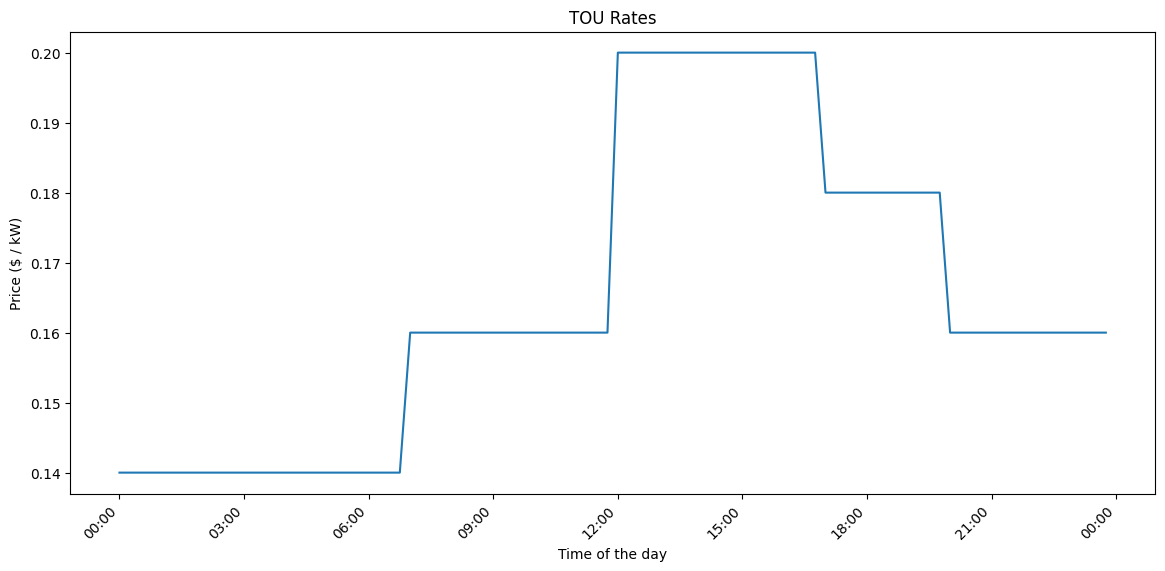

In [4]:
    # Hourly Time of Use rates ($/kWh)
LOWEST_COST = 0.14
LOW_COST = 0.16
HIGH_COST = 0.18
HIGHEST_COST = 0.20

# 00:00 - 07:00 am, 07:00 - 12:00 pm, 12:00 - 17:00 pm, 17:00 - 20:00 pm, 20:00 - 00:00 am
TOU_RATES = [LOWEST_COST]*7 + [LOW_COST]*5 + [HIGHEST_COST]*5 + [HIGH_COST]*3 + [LOW_COST]*4
HALF_HOUR_RATES = [LOWEST_COST]*28 + [LOW_COST]*20 + [HIGHEST_COST]*20 + [HIGH_COST]*12 + [LOW_COST]*16 + [LOWEST_COST]

TIME_INTERVAL = 0.25 # Time interval between two time periods is 15 minutes

# Day format, divided into half-hour intervals
TIME_FORMAT = ['00:00', '00:15', '00:30', '00:45', '01:00', '01:15', '01:30', '01:45', '02:00', '02:15', '02:30', '02:45', '03:00', '03:15', '03:30', '03:45', '04:00', '04:15', '04:30', '04:45', '05:00', '05:15', '05:30', '05:45', '06:00', '06:15', '06:30', '06:45', '07:00', '07:15', '07:30', '07:45', '08:00', '08:15', '08:30', '08:45', '09:00', '09:15', '09:30', '09:45', '10:00', '10:15', '10:30', '10:45', '11:00', '11:15', '11:30', '11:45', '12:00', '12:15', '12:30', '12:45', '13:00', '13:15', '13:30', '13:45', '14:00', '14:15', '14:30', '14:45', '15:00', '15:15', '15:30', '15:45', '16:00', '16:15', '16:30', '16:45', '17:00', '17:15', '17:30', '17:45', '18:00', '18:15', '18:30', '18:45', '19:00', '19:15', '19:30', '19:45', '20:00', '20:15', '20:30', '20:45', '21:00', '21:15', '21:30', '21:45', '22:00', '22:15', '22:30', '22:45', '23:00', '23:15', '23:30', '23:45', '00:00']

# Data are collected for a duration of "Days" days
DAYS = 2
DATE_OF_WEEK = ["1/9/2024", "1/10/2024"]

xtick_indices = [0, 12, 24, 36, 48, 60, 72, 84, 96]  # Adjust these indices based on your data
xtick_labels = ['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00', '00:00']

# Plot Electricity Prices
plt.figure(figsize=(14, 6))
plt.plot(TIME_FORMAT[:-1], HALF_HOUR_RATES[:-1])
plt.xticks(rotation=45, ha='right')

# Set the x-axis ticks at specified indices with corresponding labels
plt.xticks(ticks=xtick_indices, labels=xtick_labels)

plt.xlabel('Time of the day')
plt.ylabel('Price ($ / kW)')
plt.title('TOU Rates')

# Show the plot
plt.show()
    